In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

traditional_csvFile = "csv/compressed_traditional_CSV.csv"
vpTree_csvFile = "csv/compressed_VPtree_CSV.csv"
enhanced_csvFile = "csv/compressed_enhanced_CSV.csv"
cnnModel_csvFile = "csv/trained_cnn_CSV.csv"

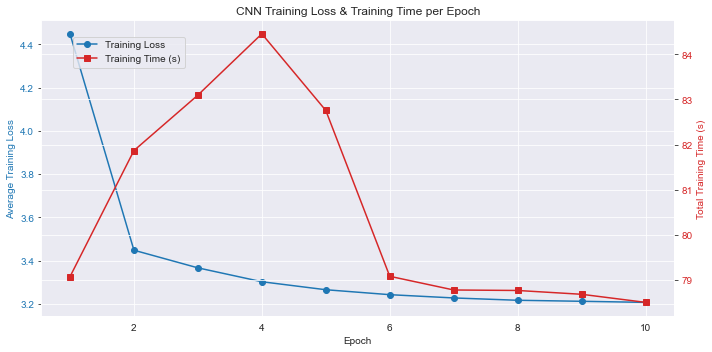

In [23]:
# CNN MODEL TRAINING TIME & ACCURACY
columns_to_display = ["Epoch", 
                      "Batch", 
                      "Training Loss", 
                      "Training Time (s)"]

try:
    # Read CSV file
    df_cnn = pd.read_csv(cnnModel_csvFile)[columns_to_display]

    # Compute the average Training Loss and total Training Time per epoch
    df_summary = df_cnn.groupby("Epoch").agg({
        "Training Loss": "mean",  # Average training loss per epoch
        "Training Time (s)": "sum"  # Total training time per epoch
    }).reset_index()

    # Set plot style
    sns.set_style("darkgrid")

    # Create figure and axis
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Plot Training Loss (left y-axis)
    color1 = "tab:blue"
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Average Training Loss", color=color1)
    line1, = ax1.plot(df_summary["Epoch"], df_summary["Training Loss"], marker="o", color=color1, label="Training Loss")
    ax1.tick_params(axis="y", labelcolor=color1)

    # Create a second y-axis for Training Time
    ax2 = ax1.twinx()
    color2 = "tab:red"
    ax2.set_ylabel("Total Training Time (s)", color=color2)
    line2, = ax2.plot(df_summary["Epoch"], df_summary["Training Time (s)"], marker="s", color=color2, label="Training Time (s)")
    ax2.tick_params(axis="y", labelcolor=color2)

    # Add a legend
    fig.legend(handles=[line1, line2], loc="upper left", bbox_to_anchor=(0.1, 0.9))

    # Show the plot
    plt.title("CNN Training Loss & Training Time per Epoch")
    fig.tight_layout()
    plt.show()

except FileNotFoundError as e:
    print(f"Error: {e}")

In [24]:
# PROPOSED KD-TREE + CNN COMPRESSION TIME ANALYSIS
columns_to_display = ["Original Image", 
                      "Build Tree Time (ms)", 
                      "Nearest Search Time (ms)", 
                      "CNN Inference Time (ms)", 
                      "Blocks (blocks/s)"]  # Include "Blocks (blocks/s)" in the columns to display

try:
    # Read CSV file
    df_enhanced = pd.read_csv(enhanced_csvFile)[columns_to_display]

    # Rename columns for clarity
    df_enhanced = df_enhanced.rename(columns={"Original Image": "Image Names"})

    ordered_columns = [
        "Image Names",
        "Build Tree Time (ms)", 
        "Nearest Search Time (ms)", 
        "CNN Inference Time (ms)",
        "Blocks (blocks/s)"  # Include this in the ordered columns
    ]

    # Display the first 5 rows
    print("First 5 Data Points:")
    display(df_enhanced.head(5))

    # Compute average and standard deviation for time-related columns
    stats = df_enhanced.iloc[:, 1:].agg(["mean", "std"])

    # Calculate "Blocks Processed per Second (bps)" (mean of "Blocks (blocks/s)")
    blocks_processed_per_second = df_enhanced["Blocks (blocks/s)"].mean()

    # Display the results
    print("\nAverage and Standard Deviation:")
    display(stats)
    
    print(f"\nAverage Blocks Processed per Second (bps): {blocks_processed_per_second:.2f}")

except FileNotFoundError as e:
    print(f"Error: {e}")


First 5 Data Points:


,Image Names,Build Tree Time (ms),Nearest Search Time (ms),CNN Inference Time (ms),Blocks (blocks/s)
0,glioma_0001.jpg,6.5148,0.6450,172.1623,1535.0698
1,glioma_0002.jpg,5.9116,0.6911,49.8588,1445.6107
2,glioma_0003.jpg,6.6431,0.6275,16.4592,1575.0481
3,glioma_0004.jpg,4.3349,0.4490,17.3173,2205.4087
4,glioma_0005.jpg,6.3908,0.5327,16.1941,1849.0999



Average and Standard Deviation:


,Build Tree Time (ms),Nearest Search Time (ms),CNN Inference Time (ms),Blocks (blocks/s)
mean,6.010234,0.606919,59.826076,1691.417139
std,6.565401,0.106922,8.939092,351.631101



Average Blocks Processed per Second (bps): 1691.42


In [25]:
# COMPARISON | traditional vs proposed | compression time and ratio
# Columns to compare
columns_to_compare = ["Original Image", 
                      "Encoding Time (s)", 
                      "Decoding Time (s)", 
                      "Original Image Size (KB)", 
                      "Compressed Image Size (KB)", 
                      "Compression Ratio"]

try:
    # Read CSV files
    df_traditional = pd.read_csv(traditional_csvFile)[columns_to_compare]
    df_enhanced = pd.read_csv(enhanced_csvFile)[columns_to_compare]

    # Rename columns for clarity
    df_traditional = df_traditional.rename(columns=lambda x: f"Traditional {x}" if x != "Original Image" else x)
    df_enhanced = df_enhanced.rename(columns=lambda x: f"Enhanced {x}" if x != "Original Image" else x)

    # Merge data on "Original Image"
    comparison_df = pd.merge(df_traditional, df_enhanced, on="Original Image")
    comparison_df = comparison_df.rename(columns={"Original Image": "Image Names"})

    # Reorder columns for side-by-side comparison
    ordered_columns = [
        "Image Names",
        "Traditional Encoding Time (s)", "Enhanced Encoding Time (s)",
        "Traditional Decoding Time (s)", "Enhanced Decoding Time (s)",
        "Traditional Original Image Size (KB)", "Enhanced Original Image Size (KB)",
        "Traditional Compressed Image Size (KB)", "Enhanced Compressed Image Size (KB)",
        "Traditional Compression Ratio", "Enhanced Compression Ratio"
    ]
    comparison_df = comparison_df[ordered_columns]

    # Display the first 5 rows
    display(comparison_df.head(5))

except FileNotFoundError as e:
    print(f"Error: {e}")


,Image Names,Traditional Encoding Time (s),Enhanced Encoding Time (s),Traditional Decoding Time (s),Enhanced Decoding Time (s),Traditional Original Image Size (KB),Enhanced Original Image Size (KB),Traditional Compressed Image Size (KB),Enhanced Compressed Image Size (KB),Traditional Compression Ratio,Enhanced Compression Ratio
0,glioma_0001.jpg,107.9857,0.8457,0.1107,0.0676,40.51,40.51,7.70,7.34,1:5,1:5
1,glioma_0002.jpg,114.4855,0.7641,0.0158,0.0354,45.25,45.25,8.53,8.10,1:5,1:5
2,glioma_0003.jpg,113.5626,0.6732,0.0158,0.0365,34.63,34.63,6.52,6.19,1:5,1:5
3,glioma_0004.jpg,118.0764,0.4882,0.0000,0.0345,32.02,32.02,5.96,5.70,1:5,1:5
4,glioma_0005.jpg,118.3600,0.5764,0.0075,0.0467,28.20,28.20,5.33,5.04,1:5,1:5


In [26]:
# COMPARISON | traditional vs proposed | image quality
# Columns to compare
columns_to_compare = ["Original Image", 
                      "Original Image Path", 
                      "Compressed Image Path", 
                      "PSNR (dB)", 
                      "SSIM"]

try:
    # Read CSV files
    df_traditional = pd.read_csv(traditional_csvFile)[columns_to_compare]
    df_enhanced = pd.read_csv(enhanced_csvFile)[columns_to_compare]

    # Rename columns for clarity
    df_traditional = df_traditional.rename(columns=lambda x: f"Traditional {x}" if x != "Original Image" else x)
    df_enhanced = df_enhanced.rename(columns=lambda x: f"Enhanced {x}" if x != "Original Image" else x)

    # Merge data on "Original Image"
    comparison_df = pd.merge(df_traditional, df_enhanced, on="Original Image")

    # Remove "data/" prefix from paths
    for col in ["Traditional Original Image Path", "Traditional Compressed Image Path", "Enhanced Compressed Image Path"]:
        comparison_df[col] = comparison_df[col].str.replace(r"^data/", "", regex=True)

    # Function to format Image Name + Image in one column
    def format_image_name(image_name, path):
        return f'<div style="text-align: center;"><b>{image_name}</b><br><img src="{path}" width="100"/></div>'

    # Apply the function to combine "Image Names" and "Original Image"
    comparison_df["Image Info"] = comparison_df.apply(lambda row: format_image_name(row["Original Image"], row["Traditional Original Image Path"]), axis=1)

    # Convert compressed image paths into images
    def path_to_img_html(path):
        return f'<img src="{path}" width="100"/>'

    comparison_df["Traditional Compressed Image"] = comparison_df["Traditional Compressed Image Path"].apply(path_to_img_html)
    comparison_df["Enhanced Compressed Image"] = comparison_df["Enhanced Compressed Image Path"].apply(path_to_img_html)

    # Reorder columns for side-by-side comparison
    ordered_columns = [
        "Image Info",  # Combined "Image Names" and "Original Image"
        "Traditional Compressed Image", "Enhanced Compressed Image",
        "Traditional PSNR (dB)", "Enhanced PSNR (dB)",
        "Traditional SSIM", "Enhanced SSIM"
    ]
    comparison_df = comparison_df[ordered_columns]

    # Display DataFrame as HTML with images
    display(HTML(comparison_df.head(5).to_html(escape=False)))

except FileNotFoundError as e:
    print(f"Error: {e}")

,Image Info,Traditional Compressed Image,Enhanced Compressed Image,Traditional PSNR (dB),Enhanced PSNR (dB),Traditional SSIM,Enhanced SSIM
0,glioma_0001.jpg,,,39.3766,24.0305,0.9752,0.8260
1,glioma_0002.jpg,,,38.6396,23.9329,0.9727,0.8028
2,glioma_0003.jpg,,,40.8086,28.0477,0.9780,0.8794
3,glioma_0004.jpg,,,40.1508,25.2129,0.9801,0.8779
4,glioma_0005.jpg,,,42.0036,27.9213,0.9825,0.8966


In [27]:
# COMPARISON | vp-tree vs proposed | compression time and ratio
# Columns to compare
columns_to_compare = ["Original Image", 
                      "Encoding Time (s)", 
                      "Decoding Time (s)", 
                      "Original Image Size (KB)", 
                      "Compressed Image Size (KB)", 
                      "Compression Ratio"]

try:
    # Read CSV files
    df_VPtree = pd.read_csv(vpTree_csvFile)[columns_to_compare]
    df_enhanced = pd.read_csv(enhanced_csvFile)[columns_to_compare]

    # Rename columns for clarity
    df_VPtree = df_VPtree.rename(columns=lambda x: f"VP-tree {x}" if x != "Original Image" else x)
    df_enhanced = df_enhanced.rename(columns=lambda x: f"Enhanced {x}" if x != "Original Image" else x)

    # Merge data on "Original Image"
    comparison_df = pd.merge(df_VPtree, df_enhanced, on="Original Image")
    comparison_df = comparison_df.rename(columns={"Original Image": "Image Names"})

    # Reorder columns for side-by-side comparison
    ordered_columns = [
        "Image Names",
        "VP-tree Encoding Time (s)", "Enhanced Encoding Time (s)",
        "VP-tree Decoding Time (s)", "Enhanced Decoding Time (s)",
        "VP-tree Original Image Size (KB)", "Enhanced Original Image Size (KB)",
        "VP-tree Compressed Image Size (KB)", "Enhanced Compressed Image Size (KB)",
        "VP-tree Compression Ratio", "Enhanced Compression Ratio"
    ]
    comparison_df = comparison_df[ordered_columns]

    # Display the first 5 rows
    display(comparison_df.head(5))

except FileNotFoundError as e:
    print(f"Error: {e}")

,Image Names,VP-tree Encoding Time (s),Enhanced Encoding Time (s),VP-tree Decoding Time (s),Enhanced Decoding Time (s),VP-tree Original Image Size (KB),Enhanced Original Image Size (KB),VP-tree Compressed Image Size (KB),Enhanced Compressed Image Size (KB),VP-tree Compression Ratio,Enhanced Compression Ratio
0,glioma_0001.jpg,0.5130,0.8457,0.0825,0.0676,40.51,40.51,7.08,7.34,1:5,1:5
1,glioma_0002.jpg,0.1351,0.7641,0.0369,0.0354,45.25,45.25,7.79,8.10,1:5,1:5
2,glioma_0003.jpg,0.0752,0.6732,0.0402,0.0365,34.63,34.63,6.02,6.19,1:5,1:5
3,glioma_0004.jpg,0.2569,0.4882,0.0369,0.0345,32.02,32.02,5.53,5.70,1:5,1:5
4,glioma_0005.jpg,0.2244,0.5764,0.0333,0.0467,28.20,28.20,4.87,5.04,1:5,1:5


In [28]:
# COMPARISON | vp-tree vs proposed | image quality
# Columns to compare
columns_to_compare = ["Original Image", 
                      "Original Image Path", 
                      "Compressed Image Path", 
                      "PSNR (dB)", 
                      "SSIM"]

try:
    # Read CSV files
    df_VPtree = pd.read_csv(vpTree_csvFile)[columns_to_compare]
    df_enhanced = pd.read_csv(enhanced_csvFile)[columns_to_compare]

    # Rename columns for clarity
    df_VPtree = df_VPtree.rename(columns=lambda x: f"VP-tree {x}" if x != "Original Image" else x)
    df_enhanced = df_enhanced.rename(columns=lambda x: f"Enhanced {x}" if x != "Original Image" else x)

    # Merge data on "Original Image"
    comparison_df = pd.merge(df_VPtree, df_enhanced, on="Original Image")

    # Remove "data/" prefix from paths
    for col in ["VP-tree Original Image Path", "VP-tree Compressed Image Path", "Enhanced Compressed Image Path"]:
        comparison_df[col] = comparison_df[col].str.replace(r"^data/", "", regex=True)

    # Function to format Image Name + Image in one column
    def format_image_name(image_name, path):
        return f'<div style="text-align: center;"><b>{image_name}</b><br><img src="{path}" width="100"/></div>'

    # Apply the function to combine "Image Names" and "Original Image"
    comparison_df["Image Info"] = comparison_df.apply(lambda row: format_image_name(row["Original Image"], row["VP-tree Original Image Path"]), axis=1)

    # Convert compressed image paths into images
    def path_to_img_html(path):
        return f'<img src="{path}" width="100"/>'

    comparison_df["VP-tree Compressed Image"] = comparison_df["VP-tree Compressed Image Path"].apply(path_to_img_html)
    comparison_df["Enhanced Compressed Image"] = comparison_df["Enhanced Compressed Image Path"].apply(path_to_img_html)

    # Reorder columns for side-by-side comparison
    ordered_columns = [
        "Image Info",  # Combined "Image Names" and "Original Image"
        "VP-tree Compressed Image", "Enhanced Compressed Image",
        "VP-tree PSNR (dB)", "Enhanced PSNR (dB)",
        "VP-tree SSIM", "Enhanced SSIM"
    ]
    comparison_df = comparison_df[ordered_columns]

    # Display DataFrame as HTML with images
    display(HTML(comparison_df.head(5).to_html(escape=False)))

except FileNotFoundError as e:
    print(f"Error: {e}")

,Image Info,VP-tree Compressed Image,Enhanced Compressed Image,VP-tree PSNR (dB),Enhanced PSNR (dB),VP-tree SSIM,Enhanced SSIM
0,glioma_0001.jpg,,,22.2738,24.0305,0.7402,0.8260
1,glioma_0002.jpg,,,22.1258,23.9329,0.7152,0.8028
2,glioma_0003.jpg,,,25.5350,28.0477,0.7995,0.8794
3,glioma_0004.jpg,,,23.6932,25.2129,0.8238,0.8779
4,glioma_0005.jpg,,,25.7694,27.9213,0.8344,0.8966


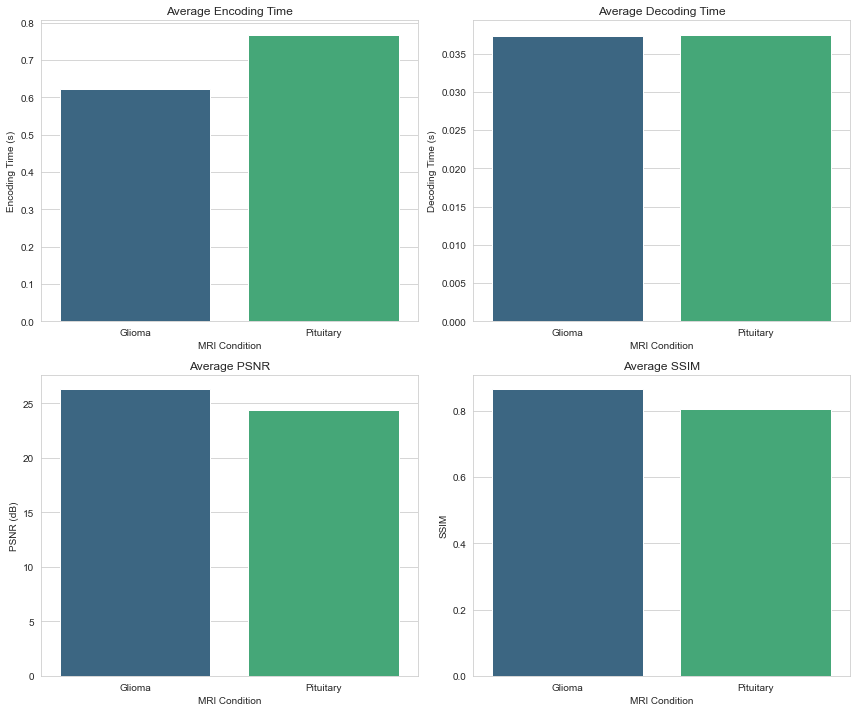

In [29]:
# Define relevant columns
columns_to_display = ["Original Image", 
                      "Encoding Time (s)", 
                      "Decoding Time (s)", 
                      "PSNR (dB)", 
                      "SSIM"]

try:
    # Read the CSV file
    df = pd.read_csv(enhanced_csvFile)[columns_to_display]

    # Extract the condition (Glioma or Pituitary) from the filename
    df["Condition"] = df["Original Image"].apply(lambda x: "Glioma" if "glioma" in x.lower() else "Pituitary" if "pituitary" in x.lower() else "Unknown")

    # Compute the averages for each category
    df_summary = df.groupby("Condition").agg({
        "Encoding Time (s)": "mean",
        "Decoding Time (s)": "mean",
        "PSNR (dB)": "mean",
        "SSIM": "mean"
    }).reset_index()

    # Set Seaborn style for better visuals
    sns.set_style("whitegrid")

    # Create subplots (2 rows, 2 columns)
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Define metrics and titles
    metrics = ["Encoding Time (s)", "Decoding Time (s)", "PSNR (dB)", "SSIM"]
    titles = ["Average Encoding Time", "Average Decoding Time", "Average PSNR", "Average SSIM"]

    # Plot each metric in its own subplot
    for i, ax in enumerate(axes.flatten()):
        sns.barplot(x="Condition", y=metrics[i], data=df_summary, ax=ax, palette="viridis", hue="Condition", legend=False)
        ax.set_title(titles[i])
        ax.set_xlabel("MRI Condition")
        ax.set_ylabel(metrics[i])

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plots
    plt.show()

except FileNotFoundError as e:
    print(f"Error: {e}")